# Student ID:
# Name:

# LAB 7: Classification using Convolutional Neural Network

# Introduction

In this tutorial, we will learn how to use the Convolutional Neural Network (CNN) to build models for classificaiton problems. We will use the popular MNIST dataset, a dataset of images.

The MNIST database, short for Modified National Institute of Standards and Technology database, is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.

The MNIST database contains 60,000 training images and 10,000 testing images of digits written by high school students and employees of the United States Census Bureau.

# Download the dataset

The Keras library conveniently includes the MNIST dataset as part of its API. You can check other datasets within the Keras library [here](https://keras.io/api/datasets/).

So, let's load the MNIST dataset from the Keras library. The dataset is readily divided into a training set and a test set.


In [1]:
import keras

# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Let's confirm the number of images in each set. According to the dataset's documentation, we should have 60000 images in X_train and 10000 images in the X_test.

In [2]:
# To complete
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Let's visualize the first image in the training set using Matplotlib's scripting layer.

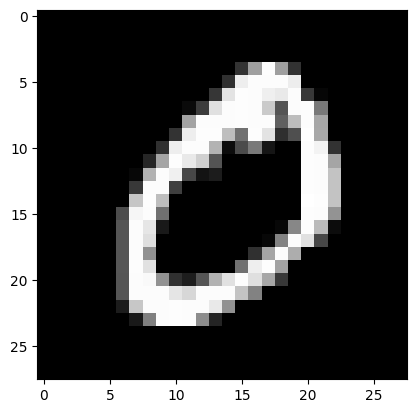

In [32]:
# To complete
import matplotlib.pyplot as plt
%matplotlib inline
image = X_train[1]
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
#Next we need to prepare the data so that it is suitable for use training a CNN.

In [27]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [28]:
X_train.shape

(60000, 28, 28, 1)

Let's normalize the pixel values to be between 0 and 1

In [29]:
# To complete
X_train = X_train / 255.0
X_test =  X_test / 255.0

In [34]:
print(y_train[59999])
print(y_train.shape)

8
(60000,)


Next, let's convert the target variable into one hot encoding

In [35]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# To complete
num_classes = 10# number of classes

In [37]:
print(y_train)
print(y_train.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(60000, 10)


# Build and evaluate a neural network

Next, let's define our neural network model.

In [38]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten, Dense

def small_convnet():

    # create model
    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

In [39]:
model = small_convnet()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 100)               230500    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 231,926
Trainable params: 231,926
Non-trainable params: 0
__________________________________________________

Let's call the function to create the model, and then train it. The model is fit over 10 epochs with a batch size of 200.

In [40]:
# To complete
model = small_convnet()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 13s - loss: 0.2818 - accuracy: 0.9223 - val_loss: 0.0964 - val_accuracy: 0.9713 - 13s/epoch - 45ms/step
Epoch 2/10
300/300 - 1s - loss: 0.0831 - accuracy: 0.9759 - val_loss: 0.0630 - val_accuracy: 0.9800 - 974ms/epoch - 3ms/step
Epoch 3/10
300/300 - 1s - loss: 0.0576 - accuracy: 0.9827 - val_loss: 0.0536 - val_accuracy: 0.9824 - 965ms/epoch - 3ms/step
Epoch 4/10
300/300 - 1s - loss: 0.0458 - accuracy: 0.9862 - val_loss: 0.0449 - val_accuracy: 0.9845 - 1s/epoch - 4ms/step
Epoch 5/10
300/300 - 1s - loss: 0.0373 - accuracy: 0.9885 - val_loss: 0.0415 - val_accuracy: 0.9850 - 1s/epoch - 4ms/step
Epoch 6/10
300/300 - 1s - loss: 0.0293 - accuracy: 0.9909 - val_loss: 0.0388 - val_accuracy: 0.9864 - 1s/epoch - 4ms/step
Epoch 7/10
300/300 - 1s - loss: 0.0243 - accuracy: 0.9923 - val_loss: 0.0468 - val_accuracy: 0.9848 - 970ms/epoch - 3ms/step
Epoch 8/10
300/300 - 1s - loss: 0.0206 - accuracy: 0.9937 - val_loss: 0.0391 - val_accuracy: 0.9870 - 1s/epoch - 3ms/step
Epoch 9/10
3

Finally, evaluate the trained model.

In [41]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Accuracy: 0.98580002784729 
 Error: 1.419997215270996


## Tasks

Let's redefine our convolutional model so that it is capable of close to state-of-the-art results. The required netwrok topology can be specified as follows:
1. Convolutional layer with 30 feature maps of size 5x5.
2. Pooling layer taking the max over 2x2 patches.
3. Convolutional layer with 15 feature maps of size 3x3.
4. Pooling layer taking the max over 2x2 patches.
5. Dropout layer with a probability of 20%.
6. Flatten layer.
7. Fully connected layer with 128 neurons and rectifier activation.
8. Fully connected layer with 50 neurons and rectifier activation.
9. Output layer.

In [ ]:
# To complete
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten, Dense, Dropout

def small_convnet():

    # create model


    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

Now, let's call the function to create our new convolutional neural network, and then let's train it and evaluate it.

In [ ]:
# To complete
model = small_convnet()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Questions:
1. How many parameters do we have in this second model? What percentage of the parameter does the last dense layer contribute w.r.t. the overall number of parameters? How many parameters are there in the pooling layers?
2. Use average pooling layer after each of the two convolution layer and compare the results.
3. Does use of LeakyRelu help improve the accuracy?